# t-SNE Explorations

In [1]:
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

## Plotting function

In [29]:
def do_plot(X_fit, title):
    dimension = X_fit.shape[1]
#     print('X_fit.shape: {}'.format(X_fit.shape))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip((0, 1, 2, 3),
                                ('black', 'red', 'green', 'blue')):
                ax.scatter(X_fit[y==lab, 0],
                           X_fit[y==lab, 1],
                           c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip((0, 1, 2, 3),
                                ('black', 'red', 'green', 'blue')):
                ax.scatter(X_fit[y==lab, 0],
                           X_fit[y==lab, 1],
                           X_fit[y==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

## Generate the data
To create a simple test case, we generate some Gaussian point clouds in $\mathbb{R}^3$. Then we see how they look embedded in $\mathbb{R}^2$ and $\mathbb{R}^3$ using various algorithms, including t-SNE.

There's one point cloud centered at the origin and three on each of the three axes. They are well separated, as can be seen in the first visualization below.

In [39]:
num_dimensions = 3
num_clusters = 4
num_points = 100
cluster_separation = 10
centers = np.array([(0,0,0), (1,0,0), (0,1,0), (0,0,1)], dtype=float) * cluster_separation
data = np.zeros((num_clusters * num_points, num_dimensions), dtype=float)
labels = np.zeros(num_clusters * num_points, dtype=int)
for c in range(num_clusters):
    start = c * num_points
    end = start + num_points
    data[start:end, :] = np.random.randn(num_points, num_dimensions) + centers[c]
    labels[start:end] = c
data_df = pd.DataFrame(data, columns=('x','y','z'))
data_df['label'] = labels
data_df.head()

,x,y,z,label
0,2.053165,0.687047,1.986002,0
1,0.206302,0.516445,-0.630684,0
2,1.059256,0.066027,0.202034,0
3,-0.618251,-0.521692,-0.190061,0
4,-0.538105,-1.513212,1.559611,0


## Prep the data for fitting and visualizing

In [49]:
X = data_df.ix[:,0:-1]
y = data_df['label'].values

## 3D view

<IPython.core.display.Javascript object>


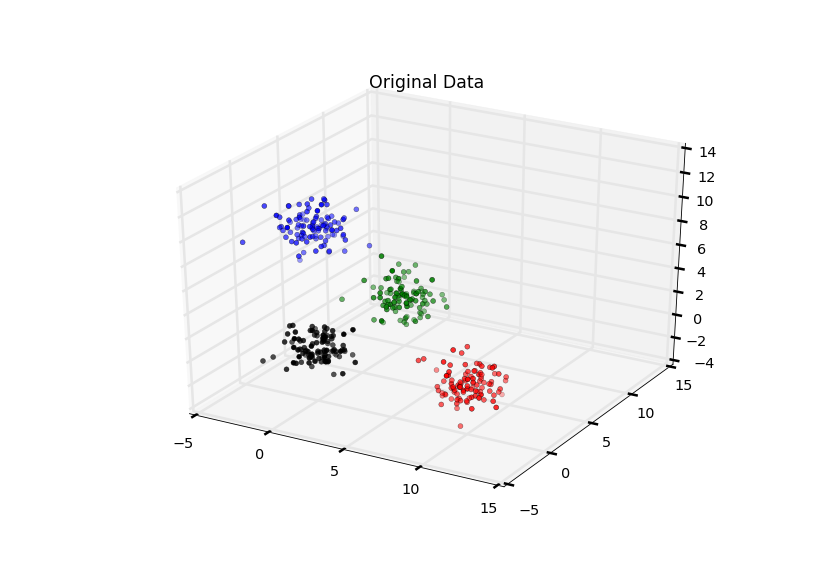

In [48]:
do_plot(X.values, 'Original Data')

In [54]:
X.values[:,0:-1].shape

(400, 2)

## Dumb 2D projection

<IPython.core.display.Javascript object>


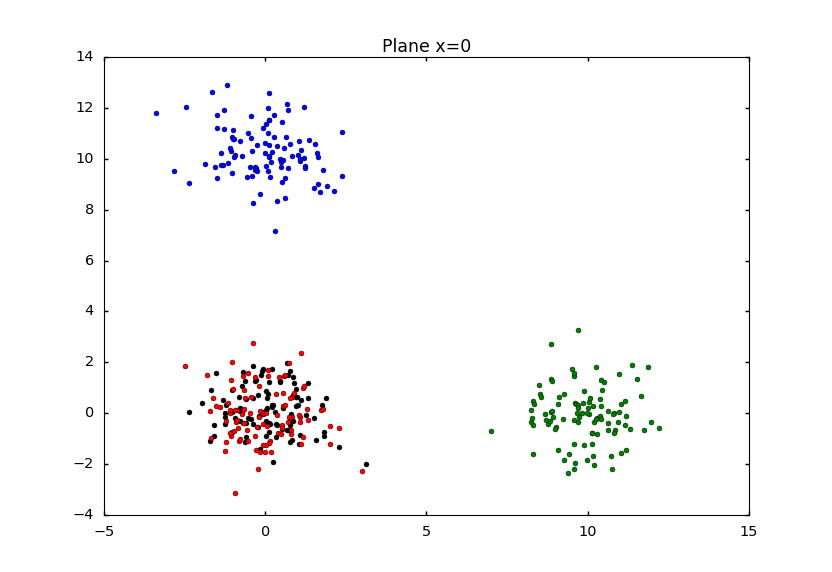

In [58]:
do_plot(X.values[:,1:], 'Plane x=0')

## PCA (2D)

<IPython.core.display.Javascript object>


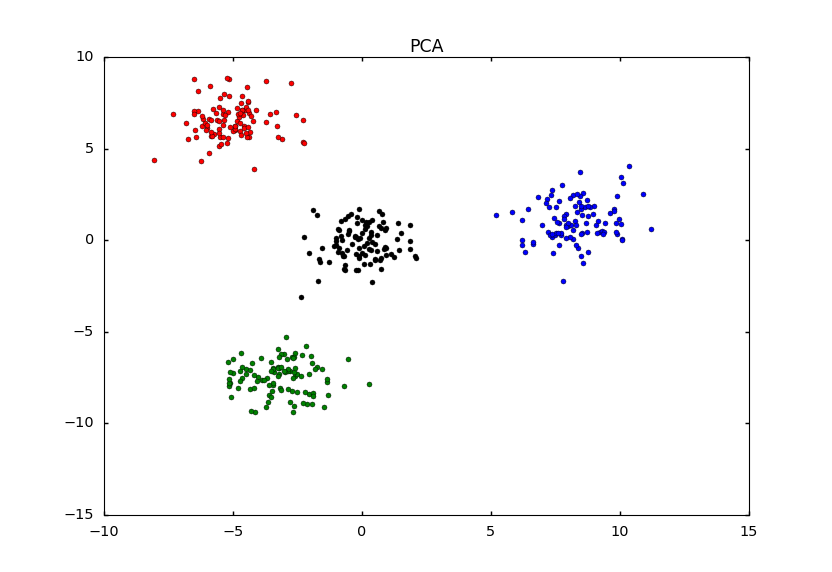

In [59]:
do_plot(PCA(n_components=2).fit_transform(X), 'PCA')

## Isomap

<IPython.core.display.Javascript object>


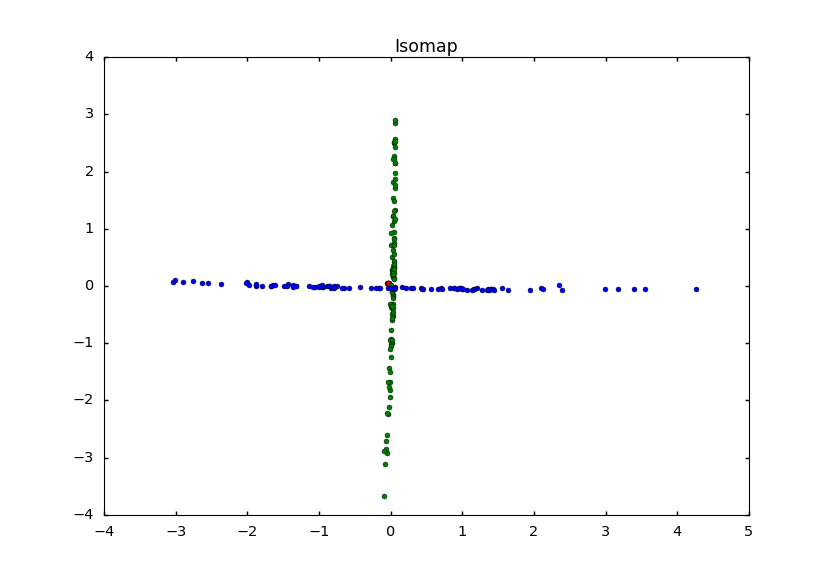

In [60]:
do_plot(Isomap(n_components=2).fit_transform(X), 'Isomap')

## Locally Linear Embedding

<IPython.core.display.Javascript object>


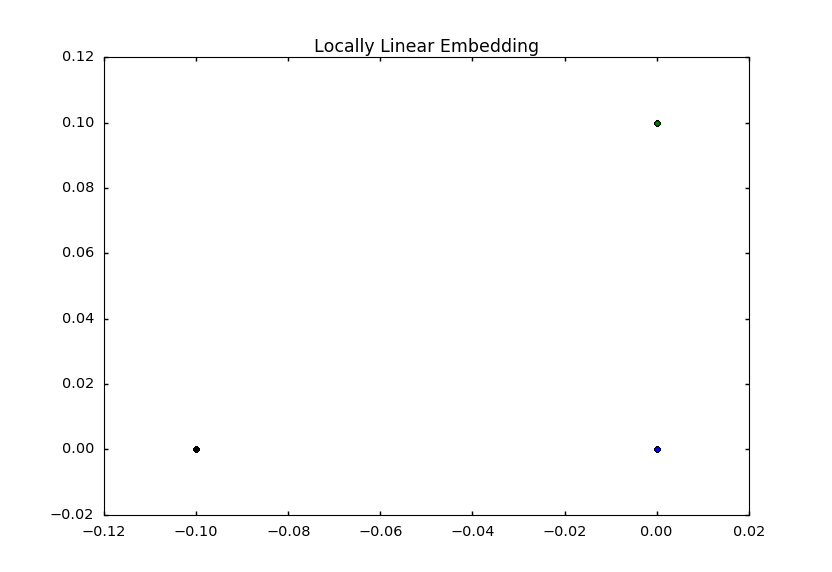

In [61]:
do_plot(LocallyLinearEmbedding(n_components=2).fit_transform(X), 'Locally Linear Embedding')

## Spectral Embedding

C:\Anaconda\envs\py35\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


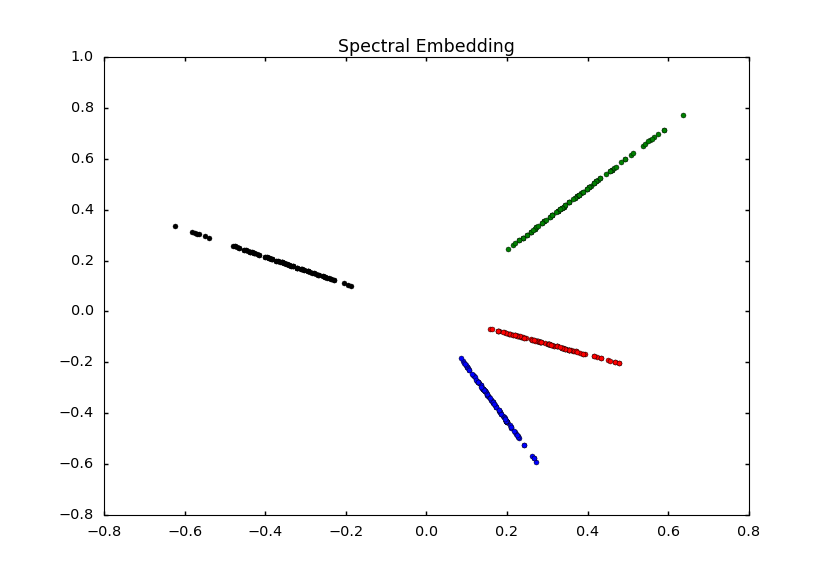

In [62]:
do_plot(SpectralEmbedding(n_components=2).fit_transform(X), 'Spectral Embedding')

## Multi-dimensional scaling (MDS)

<IPython.core.display.Javascript object>


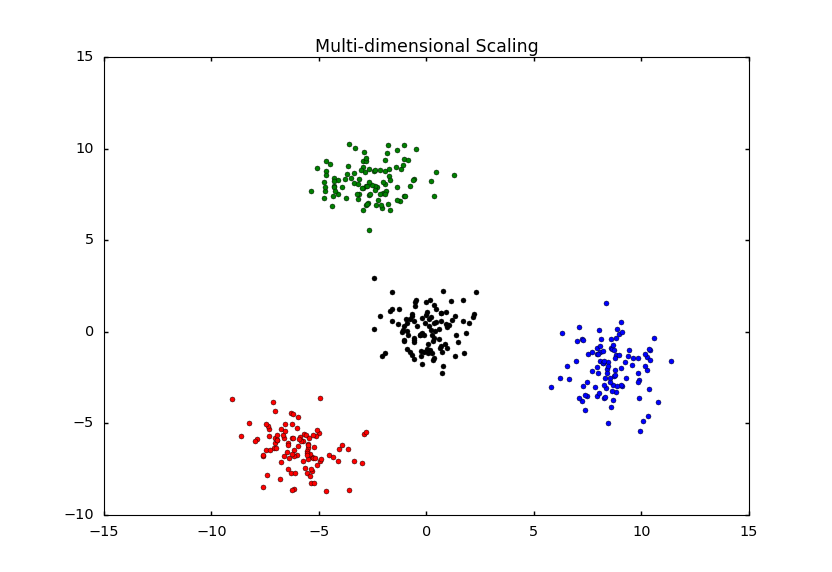

In [63]:
do_plot(MDS(n_components=2).fit_transform(X), 'Multi-dimensional Scaling')

## t-SNE (2D)

<IPython.core.display.Javascript object>


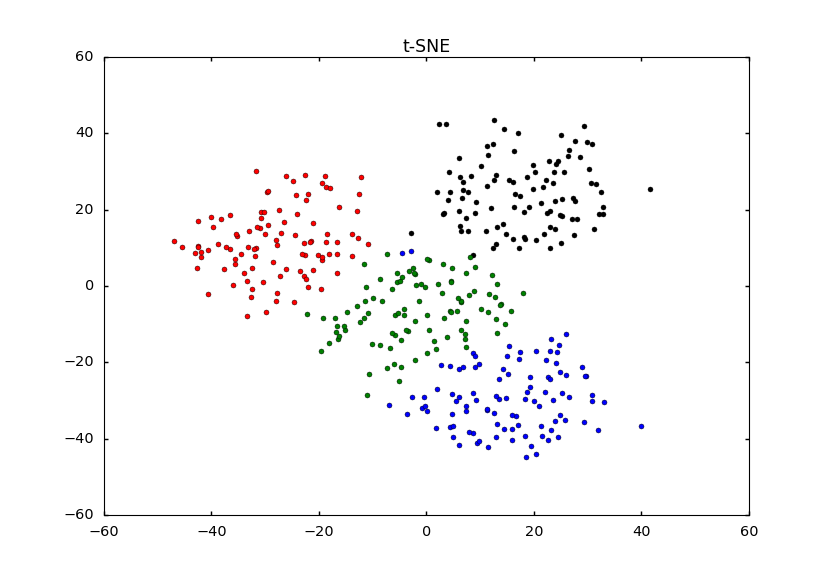

In [64]:
tsne2 = TSNE(n_components=2, random_state=0)
do_plot(tsne2.fit_transform(X), 't-SNE')

## PCA (3D)

<IPython.core.display.Javascript object>


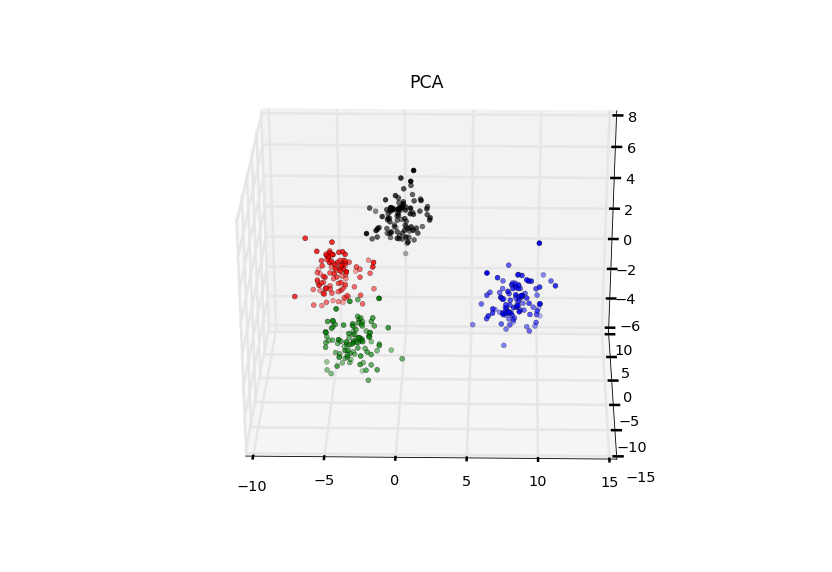

In [65]:
do_plot(PCA(n_components=3).fit_transform(X), 'PCA')

## t-SNE (3D)

<IPython.core.display.Javascript object>


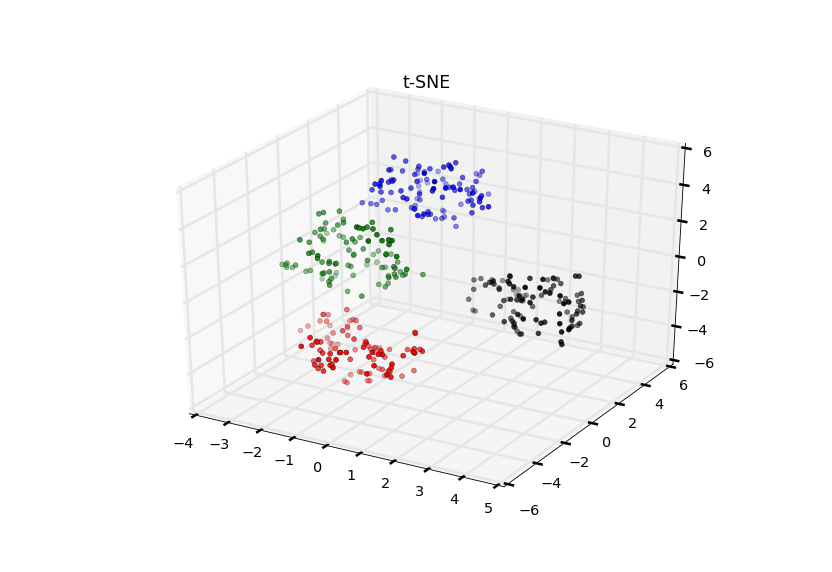

In [66]:
tsne3 = TSNE(n_components=3, learning_rate=100, random_state=0)
do_plot(tsne3.fit_transform(X), 't-SNE')